# K-means: clusterization with iris dataset
This module consist in using the iris dataset to cluster the different species of flowers according to their characteristics. Using the unsupervised K-means algorithm.

In [14]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics


In [3]:
iris = datasets.load_iris()  #cargamos el dataset

In [6]:
X_iris = iris.data
Y_iris = iris.target

In [10]:
x = pd.DataFrame(iris.data, columns=['Sepal Length','Speal Width','Petal Length','Petal Width'])
y = pd.DataFrame(iris.target,columns=['Target'])


Text(0, 0.5, 'Petal Width')

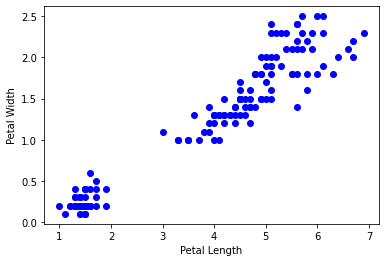

In [11]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize =10)

#### Model training

In [22]:
model = KMeans(n_clusters=3, max_iter=1000)   #aqui dividimos en dos cluster por que eso muestra la imagen
model.fit(x)
y_labels = model.labels_


In [23]:
y_kmeans = model.predict(x)
print('Prediction ', y_kmeans)

Prediction  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [25]:
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)


0.7302382722834697


78.851441426146

## Elbow method to determine k
Inertia measures how well a dataset was clustered by K-Means. A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases. To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.


Text(0, 0.5, 'Inertia')

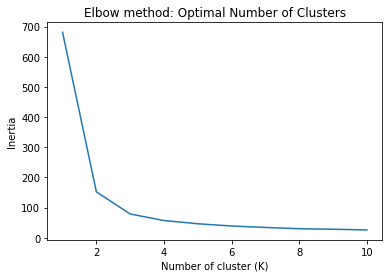

In [27]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method: Optimal Number of Clusters')
plt.xlabel('Number of cluster (K)')
plt.ylabel('Inertia')